In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno 
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Lectura de datos

In [16]:
# a. Cargar el DataFrame
df = pd.read_csv('rama_2023_05_missing_outliers_limited.csv')
# b. Mostrar las primeras filas
df.head()

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fecha   3073 non-null   object 
 1   CO      2916 non-null   float64
 2   NO      2918 non-null   float64
 3   NO2     2916 non-null   float64
 4   NOX     2931 non-null   float64
 5   O3      2916 non-null   float64
 6   PM10    2931 non-null   float64
 7   PM25    2928 non-null   float64
 8   SO2     2936 non-null   float64
dtypes: float64(8), object(1)
memory usage: 216.2+ KB


In [18]:
# Asegurarse de que a partir de la segunda columna todos los valores sean numéricos
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir la columna 'Fecha' al formato específico
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d', errors='coerce')

# Verificar si hay fechas que no se pudieron convertir
invalid_dates = df[df['fecha'].isna()]
if not invalid_dates.empty:
    print("Fechas no convertidas correctamente:")
    print(invalid_dates)

In [19]:
# Formatear la columna 'Fecha' al formato 'YYYY-MM-DD'
df['fecha'] = df['fecha'].dt.strftime('%Y-%m-%d')
df.set_index('fecha', inplace=True)
df.sort_index(inplace=True)

In [93]:
df.head()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789


In [94]:
df.describe()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
count,2916.000000,2918.000000,2916.000000,2931.000000,2916.000000,2931.000000,2928.000000,2936.000000
mean,0.546324,16.865058,22.964047,38.081554,30.462022,47.145281,23.809324,4.255579
std,1.547938,52.445837,6.738178,14.808493,8.996061,128.824262,62.176052,13.793875
min,0.115917,1.168000,8.061630,9.983402,3.226054,8.218487,2.849315,0.630435
25%,0.328456,8.071004,18.149000,27.008633,23.912015,29.542437,15.307906,1.562846
50%,0.446299,12.719253,22.364633,35.902381,29.850776,40.131720,20.526173,2.514104
75%,0.601357,19.396523,26.779887,46.770094,36.147095,52.910175,26.207407,4.390534
max,43.237677,1423.223082,72.193452,148.005952,67.443750,4055.391025,1868.719929,355.378067


In [95]:
df.isnull().sum()

CO      157
NO      155
NO2     157
NOX     142
O3      157
PM10    142
PM25    145
SO2     137
dtype: int64

# 2. Gráfico de las variables

In [20]:
def plot_time_series(df, columns, ylabel, title, start_date=None, end_date=None):
    # Configurar el tamaño de la figura del gráfico
    plt.figure(figsize=(15, 5))
    
    # Si se proporcionan fechas de inicio y fin, filtrar el DataFrame para ese rango de fechas
    if start_date and end_date:
        df = df.loc[start_date:end_date]
    
    # Iterar sobre cada columna especificada en la lista de columnas
    for column in columns:
        # Verificar si la columna existe en el DataFrame
        if column in df.columns:
            # Graficar la serie de tiempo de la columna
            plt.plot(df.index, df[column], label=column)
        else:
            # Imprimir un mensaje si la columna no se encuentra en el DataFrame
            print(f"Columna {column} no encontrada en el DataFrame")

    # Etiqueta del eje x
    plt.xlabel('Fecha')
    # Etiqueta del eje y
    plt.ylabel(ylabel)
    # Título del gráfico
    plt.title(title)
    # Mostrar la leyenda del gráfico
    plt.legend()
    # Mostrar el gráfico
    plt.show()



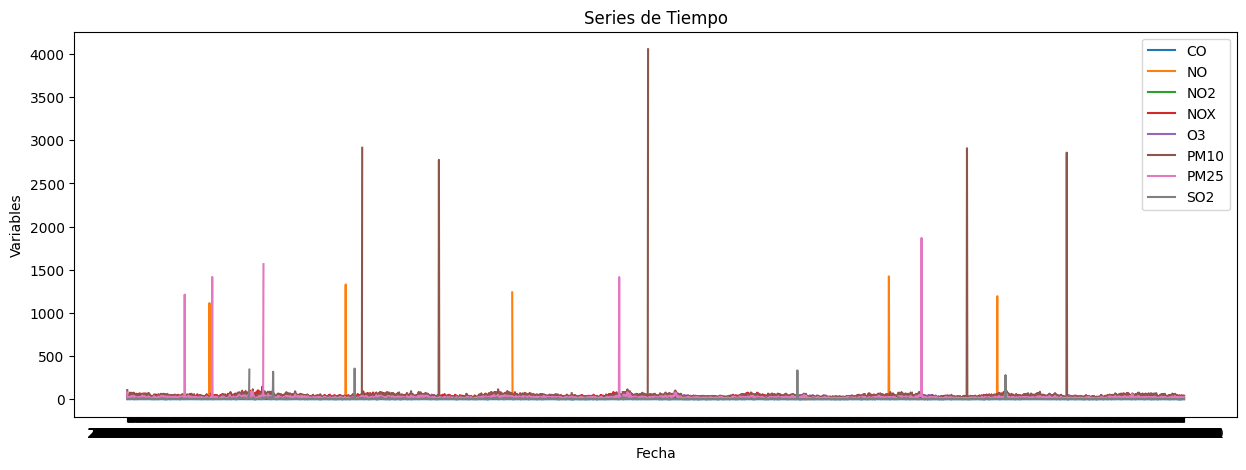

In [21]:
# a. Grafico de las series de tiempo 
plot_time_series(df, ['CO','NO','NO2','NOX','O3','PM10','PM25','SO2'], 'Variables', 'Series de Tiempo', start_date='2015-01-01', end_date='2023-05-31')


b. Identificar los valores atípicos

De acuerdo al gráfico y las medidas de tendencia central, tenemos varios datos que se salen del rango adecuado, la variable con la media más alta es PM10 con 47.14, sin embargo, tenemos picos de hasta 4055 para el caso de la misma variable.

Lo que sigue es utilizar el rango intercuartilico para cacular los limites inferior y superior de cada variable y convertir estos valores atípicos en nulos.


## 3. Identificación y manejo de valores atípicos

In [22]:
# Calcular Q1 y Q3 para cada variable numérica
quantiles = df.iloc[:, 1:].quantile([0.25, 0.75])
Q1 = quantiles.loc[0.25]
Q3 = quantiles.loc[0.75]

# Calcular IQR para cada variable
IQR = Q3 - Q1

# Calcular límites
LI = Q1 - 1.5 * IQR
LS = Q3 + 1.5 * IQR

print(LI)
print(LS)


NO     -8.917275
NO2     5.202670
NOX    -2.633559
O3      5.559396
PM10   -5.509171
PM25   -1.041346
SO2    -2.678686
dtype: float64
NO      36.384801
NO2     39.726217
NOX     76.412286
O3      54.499715
PM10    87.961782
PM25    42.556659
SO2      8.632066
dtype: float64


In [23]:
# a. Reemplazar los valores fuera de los límites por NaN
for col in df.columns[1:]:
    df[col] = df[col].mask((df[col] < LI[col]) | (df[col] > LS[col]), np.nan)

print(df)

                  CO         NO        NO2        NOX         O3       PM10  \
fecha                                                                         
2015-01-01  1.050696  22.765528  24.225155  46.987578  23.175150        NaN   
2015-01-02  0.807585  32.249608  21.554160  53.800628  17.268366  36.687845   
2015-01-03  0.640755  21.686916  19.394081  41.071651  15.486486  29.269022   
2015-01-04  0.726940  24.606272  19.560976        NaN  17.329032  39.961538   
2015-01-05  0.530815  11.443182  20.990260  32.439935  14.470588  31.855643   
...              ...        ...        ...        ...        ...        ...   
2023-05-27  0.256722   3.750583  17.284351  21.629371  41.580645        NaN   
2023-05-28  0.286826        NaN  16.349241  20.230769  36.913761  28.580000   
2023-05-29  0.482077  11.448113  24.521154  36.436321  29.697068  30.241486   
2023-05-30  0.441455  13.893519  22.615530  37.224537  36.185971  35.859532   
2023-05-31  0.340404   5.353066        NaN  25.71035

In [24]:
df.isnull().sum()

CO      157
NO      233
NO2     214
NOX     190
O3      176
PM10    166
PM25    200
SO2     388
dtype: int64

In [25]:
df.describe()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
count,2916.000000,2840.000000,2859.000000,2883.000000,2897.000000,2907.000000,2873.000000,2685.000000
mean,0.546324,14.003778,22.549973,37.279861,30.298881,41.561876,20.731456,2.858665
std,1.547938,7.641243,6.090277,13.462764,8.734846,15.438643,7.627770,1.769760
min,0.115917,1.168000,8.061630,9.983402,7.419971,8.218487,2.849315,0.630435
25%,0.328456,7.925916,18.066317,26.896994,23.876106,29.351489,15.223333,1.510569
50%,0.446299,12.509732,22.228279,35.576244,29.812395,39.908686,20.347938,2.304348
75%,0.601357,18.762940,26.427800,45.998011,36.065806,52.496351,25.794444,3.727092
max,43.237677,36.159420,39.633681,76.011594,54.305060,87.428161,42.484211,8.627907


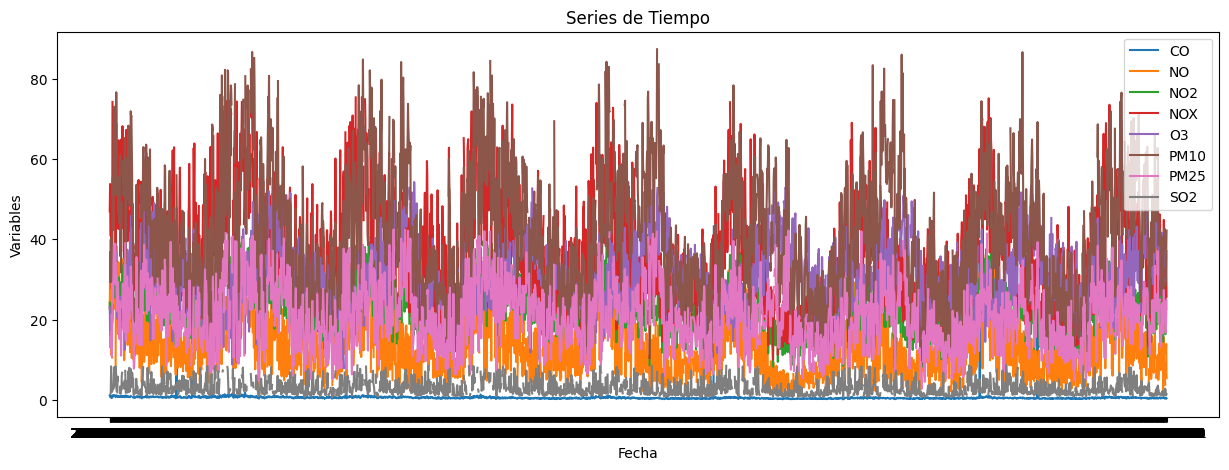

In [26]:
# Llamar a la función para graficar 
plot_time_series(df, ['CO','NO','NO2','NOX','O3','PM10','PM25','SO2'], 'Variables', 'Series de Tiempo', start_date='2015-01-01', end_date='2023-05-31')

In [28]:
# b. Imputación de valores nulos

Primeras filas del DataFrame filtrado:
                  CO         NO        NO2        NOX         O3       PM10  \
fecha                                                                         
2015-01-01  1.050696  22.765528  24.225155  46.987578  23.175150        NaN   
2015-01-02  0.807585  32.249608  21.554160  53.800628  17.268366  36.687845   
2015-01-03  0.640755  21.686916  19.394081  41.071651  15.486486  29.269022   
2015-01-04  0.726940  24.606272  19.560976        NaN  17.329032  39.961538   
2015-01-05  0.530815  11.443182  20.990260  32.439935  14.470588  31.855643   

                 PM25       SO2  
fecha                            
2015-01-01        NaN       NaN  
2015-01-02  15.449438       NaN  
2015-01-03  12.915129  1.436937  
2015-01-04  16.838284  1.809061  
2015-01-05        NaN  8.315789  


<Figure size 1200x600 with 0 Axes>

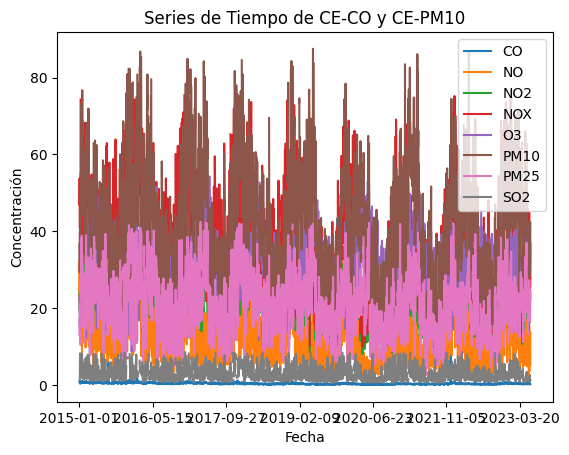


Número de valores nulos antes de la imputación:
CO      157
NO      233
NO2     214
NOX     190
O3      176
PM10    166
PM25    200
SO2     388
dtype: int64


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

df_impute = df[['CO','NO','NO2','NOX','O3','PM10','PM25','SO2']].loc['2015-01-01':'2023-05-31']

# Mostrar las primeras filas del DataFrame filtrado
print("Primeras filas del DataFrame filtrado:")
print(df_impute.head())

# Graficar las series de tiempo
plt.figure(figsize=(12, 6))
df_impute.plot()
plt.title('Series de Tiempo de CE-CO y CE-PM10')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()

# Contar y mostrar el número de valores nulos en cada columna del DataFrame filtrado
print("\nNúmero de valores nulos antes de la imputación:")
print(df_impute.isnull().sum())

# Crear una instancia del imputador KNN con 12 vecinos
imputer_knn = KNNImputer(n_neighbors=12)

# Aplicar el imputador KNN para llenar los valores nulos en el DataFrame
df_impute.loc[:, :] = imputer_knn.fit_transform(df_impute)

In [30]:
df_impute.isnull().sum()

CO      0
NO      0
NO2     0
NOX     0
O3      0
PM10    0
PM25    0
SO2     0
dtype: int64

In [105]:
df_impute.to_csv('Datos_procesados_Reto4.csv',index=False)

# 4. Análisis descriptivo de las series de tiempo

# 5. Modelación y predicción

In [ ]:
#%pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras import backend as K

In [2]:
def rmse(y_true, y_pred):
    """
    Calcula el error cuadrático medio (RMSE) entre las predicciones y los valores verdaderos.

    Args:
        y_true (tensor): Valores verdaderos.
        y_pred (tensor): Valores predichos.

    Returns:
        tensor: RMSE.
    """
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


def split_dataframe(df, train_ratio=0.7, test_ratio=0.2):
    """
    Divide un DataFrame en conjuntos de entrenamiento, prueba y evaluación.

    Args:
        df (DataFrame): El DataFrame a dividir.
        train_ratio (float, optional): Proporción de datos para entrenamiento. Defaults to 0.7.
        test_ratio (float, optional): Proporción de datos para prueba. Defaults to 0.2.

    Returns:
        tuple: DataFrames de entrenamiento, prueba y evaluación.
    """
    total_size = len(df)  # Tamaño total del DataFrame
    train_size = int(total_size * train_ratio)  # Tamaño del conjunto de entrenamiento
    test_size = int(total_size * test_ratio)  # Tamaño del conjunto de prueba
    eval_size = total_size - train_size - test_size  # Tamaño del conjunto de evaluación
    
    df_train = df.iloc[:train_size]  # Conjunto de entrenamiento
    df_test = df.iloc[train_size:train_size + test_size]  # Conjunto de prueba
    df_eval = df.iloc[train_size + test_size:]  # Conjunto de evaluación
    
    return df_train, df_test, df_eval


def scale_datasets(train_df, test_df, eval_df):
    """
    Escala los conjuntos de datos de entrenamiento, prueba y evaluación.

    Args:
        train_df (DataFrame): DataFrame de entrenamiento.
        test_df (DataFrame): DataFrame de prueba.
        eval_df (DataFrame): DataFrame de evaluación.

    Returns:
        tuple: DataFrames escalados de entrenamiento, prueba y evaluación, y diccionario de escaladores.
    """
    scalers = {}  # Diccionario para almacenar los escaladores
    scaled_train_df = train_df.copy()  # Copia del DataFrame de entrenamiento
    scaled_test_df = test_df.copy()  # Copia del DataFrame de prueba
    scaled_eval_df = eval_df.copy()  # Copia del DataFrame de evaluación
    
    for column in train_df.columns:
        scaler = MinMaxScaler()  # Crear un escalador MinMax para cada columna
        scaled_train_df[column] = scaler.fit_transform(train_df[[column]])  # Ajustar y transformar los datos de entrenamiento
        scaled_test_df[column] = scaler.transform(test_df[[column]])  # Transformar los datos de prueba
        scaled_eval_df[column] = scaler.transform(eval_df[[column]])  # Transformar los datos de evaluación
        scalers[column] = scaler  # Guardar el escalador para cada columna
        
    return scaled_train_df, scaled_test_df, scaled_eval_df, scalers

def create_sequences(data, input_columns, output_columns, time_steps, future_steps=1):
    """
    Crea secuencias de datos para modelado de series temporales.

    Args:
        data (DataFrame): DataFrame con los datos.
        input_columns (list): Columnas de entrada.
        output_columns (list): Columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias de entrada.
        future_steps (int, optional): Número de pasos de tiempo futuros para las secuencias de salida. Defaults to 1.

    Returns:
        tuple: Arrays de entrada y salida para el modelo.
    """
    X, y = [], []  # Listas para almacenar las secuencias de entrada y salida
    data_array = data.values  # Convertir el DataFrame a un array numpy

    input_indices = data.columns.get_indexer(input_columns)  # Índices de las columnas de entrada
    output_indices = data.columns.get_indexer(output_columns)  # Índices de las columnas de salida

    for i in range(len(data) - time_steps - future_steps + 1):
        X.append(data_array[i:i + time_steps, input_indices])  # Crear secuencia de entrada
        y.append(data_array[i + time_steps:i + time_steps + future_steps, output_indices].flatten())  # Crear secuencia de salida
    
    return np.array(X), np.array(y)

def create_simple_rnn_model(input_shape, output_size, future_steps, rnn_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo SimpleRNN.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        rnn_units (int, optional): Unidades de la capa RNN. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de SimpleRNN.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(SimpleRNN(rnn_units, input_shape=input_shape, return_sequences=False))  # Añadir capa SimpleRNN
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def create_lstm_model(input_shape, output_size, future_steps, lstm_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo LSTM.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        lstm_units (int, optional): Unidades de la capa LSTM. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de LSTM.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(LSTM(lstm_units, input_shape=input_shape, return_sequences=False))  # Añadir capa LSTM
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model


def create_gru_model(input_shape, output_size, future_steps, gru_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo GRU.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        gru_units (int, optional): Unidades de la capa GRU. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de GRU.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(GRU(gru_units, input_shape=input_shape, return_sequences=False))  # Añadir capa GRU
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def plot_final_prediction(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica las predicciones finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(y_rescaled[:, i], label='Valor Real')  # Graficar valores reales
        plt.plot(predictions_rescaled[:, -1, i], label='Predicción')  # Graficar predicciones
        plt.title(f'{title} - Variable {output_columns[i]}')  # Añadir título
        plt.legend()  
    
    plt.tight_layout() 
    plt.show() 

# Función para graficar los errores finales del modelo
def plot_final_errors(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica los errores finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    errors_rescaled = y_rescaled - predictions_rescaled[:, -1, :]  # Calcular errores reescalados
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(errors_rescaled[:, i], label='Error')  # Graficar errores
        plt.title(f'{title} - Error Variable {output_columns[i]}')  # Añadir título
        plt.legend() 
    
    plt.tight_layout()  
    plt.show()

def plot_training_history(history, title='Historial de Entrenamiento'):
    """
    Grafica el historial de entrenamiento del modelo.

    Args:
        history (History): Historial de entrenamiento del modelo.
        title (str, optional): Título de la gráfica. Defaults to 'Historial de Entrenamiento'.
    """
    # Extraer la información del historial
    history_dict = history.history
    
    # Crear una figura
    plt.figure(figsize=(14, 5))

    # Graficar la pérdida (loss)
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['loss'], label='Pérdida en Entrenamiento')
    if 'val_loss' in history_dict:
        plt.plot(history_dict['val_loss'], label='Pérdida en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Pérdida durante el Entrenamiento')
    plt.legend()

    # Graficar la métrica RMSE
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['rmse'], label='RMSE en Entrenamiento')
    if 'val_rmse' in history_dict:
        plt.plot(history_dict['val_rmse'], label='RMSE en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('RMSE')
    plt.title('RMSE durante el Entrenamiento')
    plt.legend()

    # Ajustar el diseño y mostrar la gráfica
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [3]:
# Paso 1: Leer el archivo CSV
file_path = 'Datos_procesados_Reto4.csv'  # Reemplaza con la ruta a tu archivo
df = pd.read_csv(file_path)

df_train, df_test, df_eval = split_dataframe(df, train_ratio=0.7, test_ratio=0.2)

print(f"Tamaño de datos de entrenamiento: {len(df_train)}")
print(f"Tamaño de datos de prueba: {len(df_test)}")
print(f"Tamaño de datos de evaluación: {len(df_eval)}")

Tamaño de datos de entrenamiento: 2151
Tamaño de datos de prueba: 614
Tamaño de datos de evaluación: 308


## b,c.  Primer modelo (Univariado multi-step con SimpleRNN)

In [6]:
# a. Se utilizará la variable S02
scaled_train_df, scaled_test_df, scaled_eval_df, scalers = scale_datasets(df_train, df_test, df_eval)

time_steps = 24
future_steps = 6
input_columns = ['SO2']  # Nombres de las columnas de entrada en el DataFrame escalado
output_columns = ['SO2']  # Nombres de las columnas de salida en el DataFrame escalado


X_train, y_train = create_sequences(scaled_train_df, input_columns, output_columns, time_steps, future_steps)
X_test, y_test = create_sequences(scaled_test_df, input_columns, output_columns, time_steps, future_steps)
X_eval, y_eval = create_sequences(scaled_eval_df, input_columns, output_columns, time_steps, future_steps)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_test: {y_test.shape}")
print(f"Tamaño de X_eval: {X_eval.shape}")
print(f"Tamaño de y_eval: {y_eval.shape}")

input_shape = (X_train.shape[1], X_train.shape[2])
output_size = len(output_columns)

Tamaño de X_train: (2122, 24, 1)
Tamaño de y_train: (2122, 6)
Tamaño de X_test: (585, 24, 1)
Tamaño de y_test: (585, 6)
Tamaño de X_eval: (279, 24, 1)
Tamaño de y_eval: (279, 6)


Epoch 1/50
17/17 [==============================] - 2s 25ms/step - loss: 0.1249 - rmse: 0.3391 - val_loss: 0.0505 - val_rmse: 0.2193
Epoch 2/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0485 - rmse: 0.2202 - val_loss: 0.0481 - val_rmse: 0.2144
Epoch 3/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0456 - rmse: 0.2136 - val_loss: 0.0414 - val_rmse: 0.1969
Epoch 4/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0439 - rmse: 0.2098 - val_loss: 0.0411 - val_rmse: 0.1968
Epoch 5/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0432 - rmse: 0.2076 - val_loss: 0.0408 - val_rmse: 0.1957
Epoch 6/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0432 - rmse: 0.2078 - val_loss: 0.0413 - val_rmse: 0.1976
Epoch 7/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0431 - rmse: 0.2076 - val_loss: 0.0407 - val_rmse: 0.1957
Epoch 8/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0

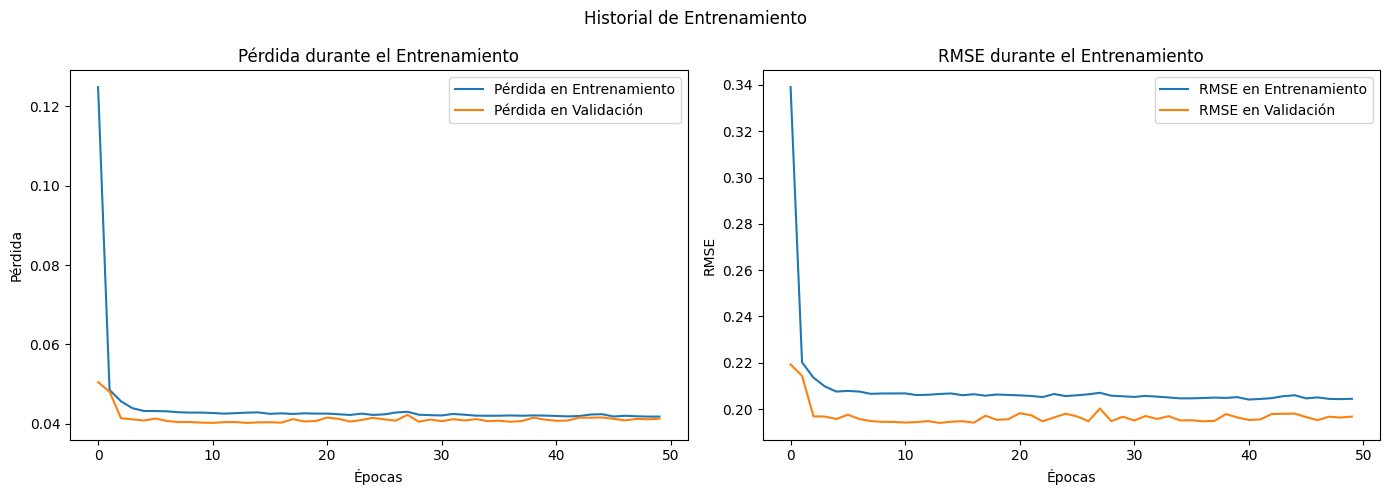

In [7]:
# Crear y entrenar el modelo SimpleRNN
model_simple_rnn = create_simple_rnn_model(input_shape, output_size, future_steps)
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_simple_rnn)

In [8]:
# Evaluar los modelos en el conjunto de evaluación
loss_simple_rnn, rmse_simple_rnn = model_simple_rnn.evaluate(X_eval, y_eval)
print(f"SimpleRNN - Loss en el conjunto de evaluación: {loss_simple_rnn}")
print(f"SimpleRNN - RMSE en el conjunto de evaluación: {rmse_simple_rnn}")

9/9 [==============================] - 0s 3ms/step - loss: 0.0294 - rmse: 0.1636
SimpleRNN - Loss en el conjunto de evaluación: 0.029425833374261856
SimpleRNN - RMSE en el conjunto de evaluación: 0.16363109648227692


9/9 [==============================] - 0s 4ms/step


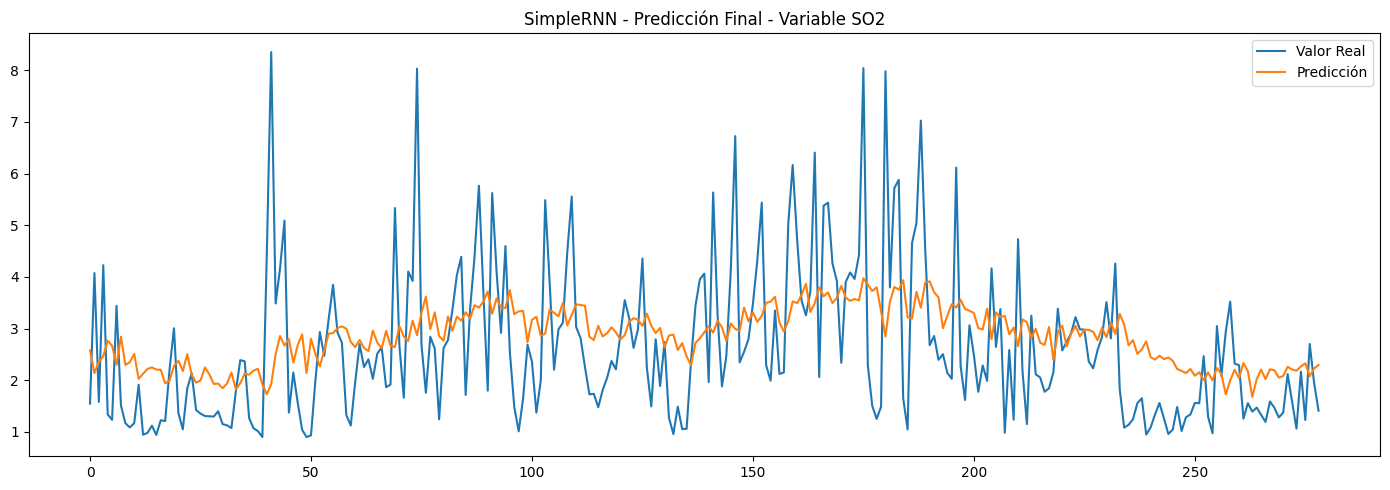

9/9 [==============================] - 0s 2ms/step


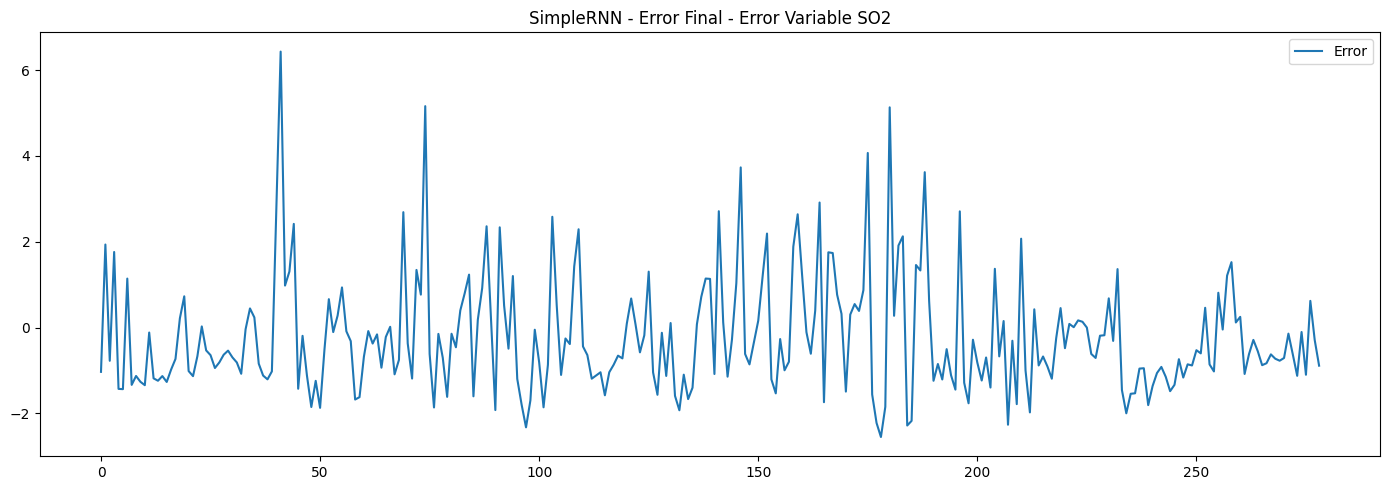

In [9]:
plot_final_prediction(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Predicción Final')
plot_final_errors(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Error Final')

1/1 [==============================] - 0s 67ms/step


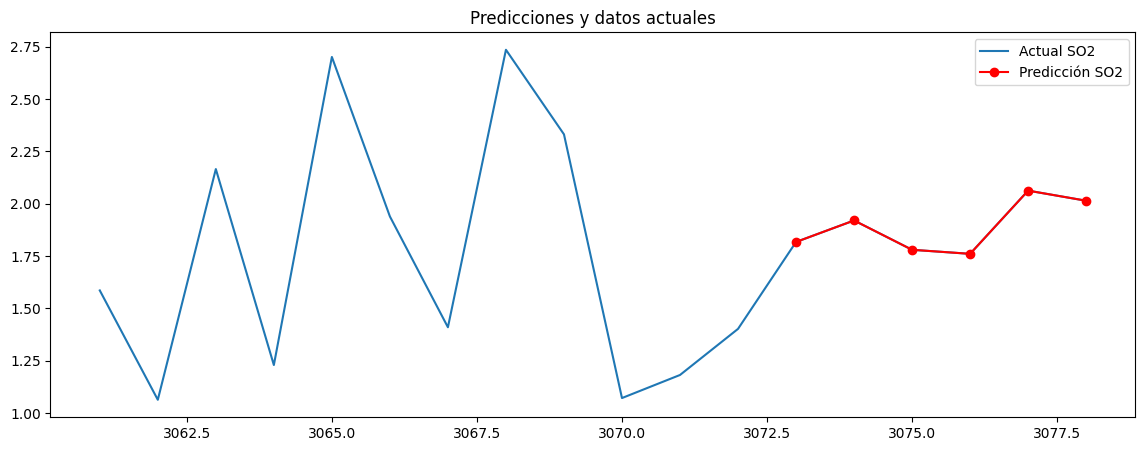

In [10]:
def add_predictions(model, data, input_columns, output_columns, time_steps, future_steps):
    """
    Añade múltiples predicciones al DataFrame de una sola vez.
    
    Args:
        model: Modelo entrenado.
        data (pd.DataFrame): DataFrame con los datos originales.
        input_columns (list of str): Lista de nombres de las columnas de entrada.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
        
    Returns:
        pd.DataFrame: DataFrame con las predicciones añadidas.
    """
    # Escaladores
    scalers = {col: MinMaxScaler() for col in data.columns}
    
    # Escalar datos
    scaled_data = data.copy()
    for col in data.columns:
        scaled_data[col] = scalers[col].fit_transform(data[[col]])
    
    # Seleccionar la última secuencia de time_steps
    last_seq = scaled_data[input_columns].values[-time_steps:]
    last_seq = np.expand_dims(last_seq, axis=0)
    
    # Realizar la predicción
    predictions_scaled = model.predict(last_seq)
    
    # Reescalar las predicciones
    predictions = np.zeros((future_steps, len(output_columns)))
    for i, col in enumerate(output_columns):
        predictions[:, i] = scalers[col].inverse_transform(predictions_scaled[:, i::len(output_columns)].reshape(-1, 1)).reshape(-1)
    
    # Crear un DataFrame para las predicciones
    predictions_df = pd.DataFrame(predictions, columns=output_columns)
    
    # Añadir las predicciones al DataFrame original
    data_with_predictions = pd.concat([data, predictions_df], ignore_index=True)
    
    return data_with_predictions

def plot_with_predictions(data, output_columns, plot_steps, future_steps):
    """
    Visualiza los datos actuales y las predicciones.
    
    Args:
        data (pd.DataFrame): DataFrame con los datos actuales y las predicciones.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        plot_steps (int): Número de pasos de tiempo a graficar antes de la predicción.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
    """
    plt.figure(figsize=(14, 5))
    for col in output_columns:
        plt.plot(data.index[-(plot_steps + future_steps):], data[col].iloc[-(plot_steps + future_steps):], label=f'Actual {col}')
        plt.plot(data.index[-future_steps:], data[col].iloc[-future_steps:], 'ro-', label=f'Predicción {col}')
    
    plt.title('Predicciones y datos actuales')
    plt.legend()
    plt.show()
plot_steps = 12  # Número de pasos de tiempo a graficar antes de la predicción

# Añadir predicciones y visualizar
df_with_predictions = add_predictions(model_simple_rnn, df, input_columns, output_columns, time_steps, future_steps)
plot_with_predictions(df_with_predictions, output_columns, plot_steps, future_steps)

## d. Segundo modelo (Multivariado multi-step con SimpleRNN)

In [12]:
scaled_train_df, scaled_test_df, scaled_eval_df, scalers = scale_datasets(df_train, df_test, df_eval)

time_steps = 24
future_steps = 6
input_columns = ['CO','PM10','O3','SO2']  # Nombres de las columnas de entrada en el DataFrame escalado
#input_columns = ['SO2']  # Nombres de las columnas de entrada en el DataFrame escalado
output_columns = ['SO2']  # Nombres de las columnas de salida en el DataFrame escalado


X_train, y_train = create_sequences(scaled_train_df, input_columns, output_columns, time_steps, future_steps)
X_test, y_test = create_sequences(scaled_test_df, input_columns, output_columns, time_steps, future_steps)
X_eval, y_eval = create_sequences(scaled_eval_df, input_columns, output_columns, time_steps, future_steps)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_test: {y_test.shape}")
print(f"Tamaño de X_eval: {X_eval.shape}")
print(f"Tamaño de y_eval: {y_eval.shape}")

input_shape = (X_train.shape[1], X_train.shape[2])
output_size = len(output_columns)

Tamaño de X_train: (2122, 24, 4)
Tamaño de y_train: (2122, 6)
Tamaño de X_test: (585, 24, 4)
Tamaño de y_test: (585, 6)
Tamaño de X_eval: (279, 24, 4)
Tamaño de y_eval: (279, 6)


Epoch 1/50
17/17 [==============================] - 2s 23ms/step - loss: 0.0836 - rmse: 0.2800 - val_loss: 0.0479 - val_rmse: 0.2144
Epoch 2/50
17/17 [==============================] - 0s 10ms/step - loss: 0.0488 - rmse: 0.2206 - val_loss: 0.0437 - val_rmse: 0.2038
Epoch 3/50
17/17 [==============================] - 0s 10ms/step - loss: 0.0449 - rmse: 0.2107 - val_loss: 0.0402 - val_rmse: 0.1939
Epoch 4/50
17/17 [==============================] - 0s 10ms/step - loss: 0.0436 - rmse: 0.2089 - val_loss: 0.0415 - val_rmse: 0.1975
Epoch 5/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0428 - rmse: 0.2065 - val_loss: 0.0393 - val_rmse: 0.1917
Epoch 6/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0420 - rmse: 0.2050 - val_loss: 0.0395 - val_rmse: 0.1921
Epoch 7/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0418 - rmse: 0.2042 - val_loss: 0.0393 - val_rmse: 0.1915
Epoch 8/50
17/17 [==============================] - 0s 8ms/step - loss: 

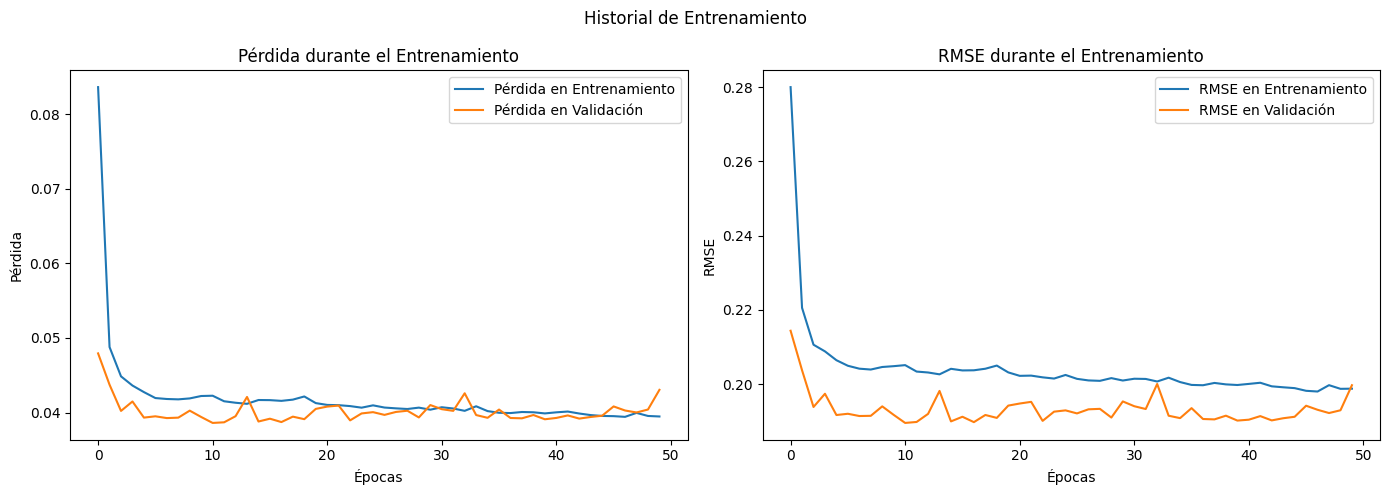

In [13]:
# Crear y entrenar el modelo SimpleRNN
model_simple_rnn = create_simple_rnn_model(input_shape, output_size, future_steps)
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_simple_rnn)

9/9 [==============================] - 0s 2ms/step


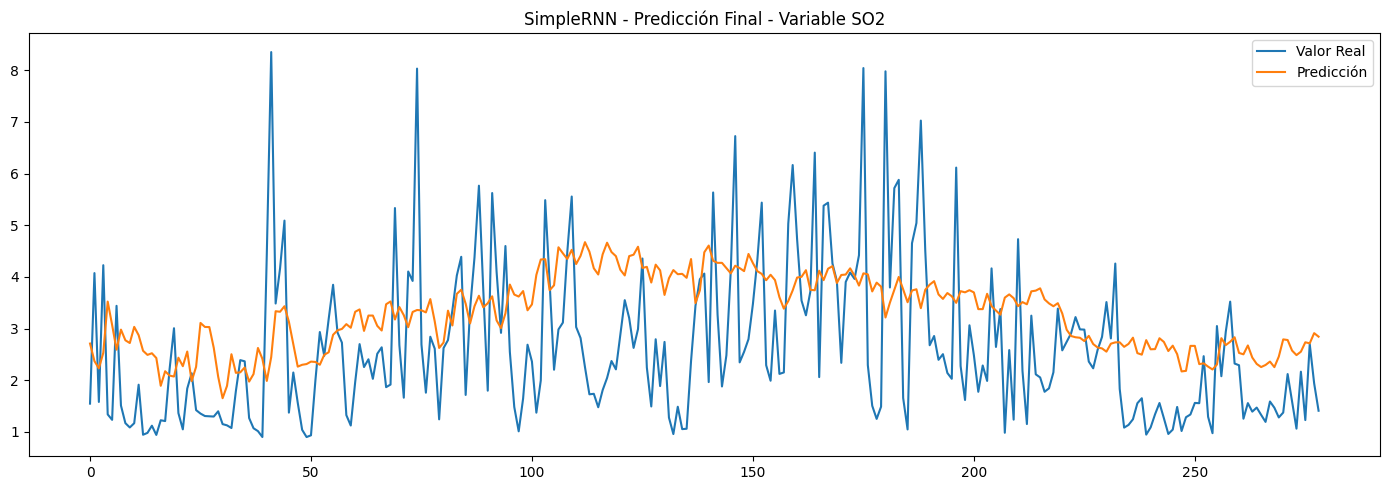

9/9 [==============================] - 0s 2ms/step


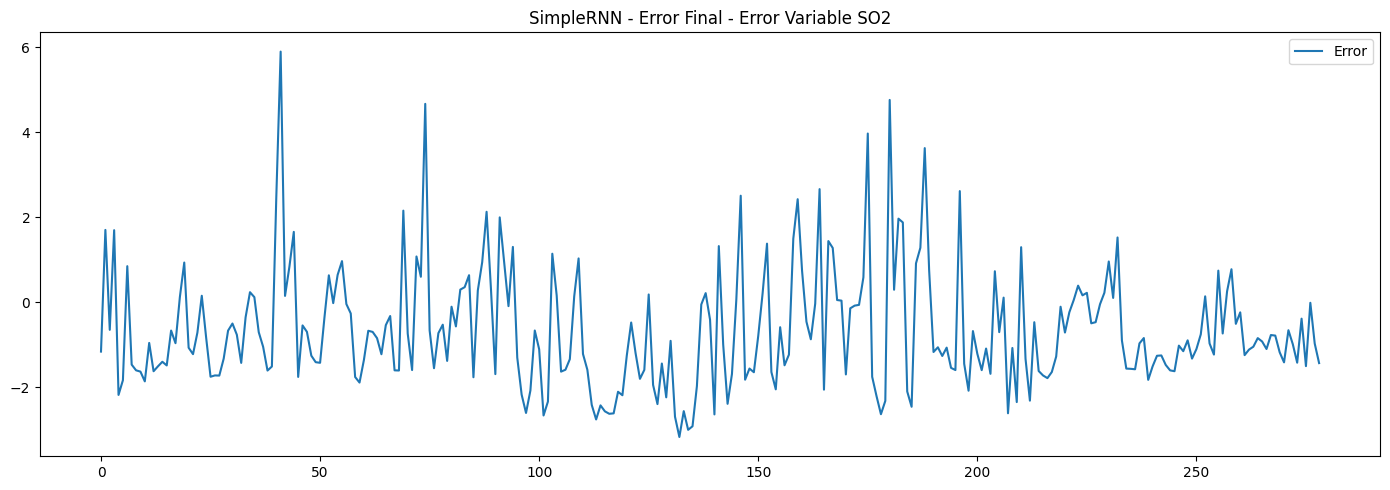

In [14]:
# Visualizar predicciones y errores para el modelo
plot_final_prediction(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Predicción Final')
plot_final_errors(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Error Final')

1/1 [==============================] - 0s 19ms/step


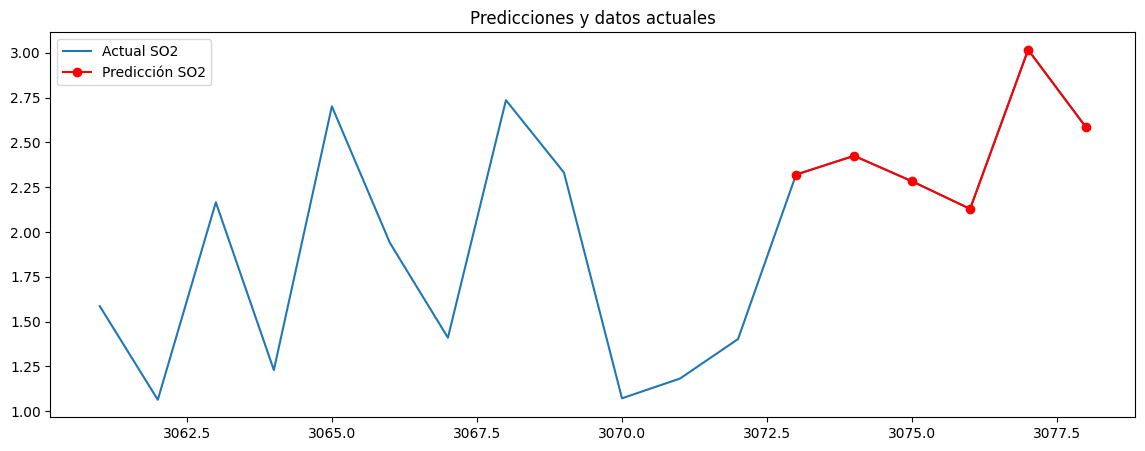

In [15]:
def add_predictions(model, data, input_columns, output_columns, time_steps, future_steps):
    """
    Añade múltiples predicciones al DataFrame de una sola vez.
    
    Args:
        model: Modelo entrenado.
        data (pd.DataFrame): DataFrame con los datos originales.
        input_columns (list of str): Lista de nombres de las columnas de entrada.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
        
    Returns:
        pd.DataFrame: DataFrame con las predicciones añadidas.
    """
    # Escaladores
    scalers = {col: MinMaxScaler() for col in data.columns}
    
    # Escalar datos
    scaled_data = data.copy()
    for col in data.columns:
        scaled_data[col] = scalers[col].fit_transform(data[[col]])
    
    # Seleccionar la última secuencia de time_steps
    last_seq = scaled_data[input_columns].values[-time_steps:]
    last_seq = np.expand_dims(last_seq, axis=0)
    
    # Realizar la predicción
    predictions_scaled = model.predict(last_seq)
    
    # Reescalar las predicciones
    predictions = np.zeros((future_steps, len(output_columns)))
    for i, col in enumerate(output_columns):
        predictions[:, i] = scalers[col].inverse_transform(predictions_scaled[:, i::len(output_columns)].reshape(-1, 1)).reshape(-1)
    
    # Crear un DataFrame para las predicciones
    predictions_df = pd.DataFrame(predictions, columns=output_columns)
    
    # Añadir las predicciones al DataFrame original
    data_with_predictions = pd.concat([data, predictions_df], ignore_index=True)
    
    return data_with_predictions

def plot_with_predictions(data, output_columns, plot_steps, future_steps):
    """
    Visualiza los datos actuales y las predicciones.
    
    Args:
        data (pd.DataFrame): DataFrame con los datos actuales y las predicciones.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        plot_steps (int): Número de pasos de tiempo a graficar antes de la predicción.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
    """
    plt.figure(figsize=(14, 5))
    for col in output_columns:
        plt.plot(data.index[-(plot_steps + future_steps):], data[col].iloc[-(plot_steps + future_steps):], label=f'Actual {col}')
        plt.plot(data.index[-future_steps:], data[col].iloc[-future_steps:], 'ro-', label=f'Predicción {col}')
    
    plt.title('Predicciones y datos actuales')
    plt.legend()
    plt.show()
plot_steps = 12  # Número de pasos de tiempo a graficar antes de la predicción

# Añadir predicciones y visualizar
df_with_predictions = add_predictions(model_simple_rnn, df, input_columns, output_columns, time_steps, future_steps)
plot_with_predictions(df_with_predictions, output_columns, plot_steps, future_steps)